### Income Measures from Census

Typically annual data such as from the ACS and CPS ASEC

In [1]:
import sys
sys.path.append('../src')

import uschartbook.config

from uschartbook.config import *
from uschartbook.utils import *

Total percent change in personal income, 2020 vs 2019:  -1.21%
                              ContribP  ContribM  Contrib
Name                                                     
Total                             0.27     -1.48    -1.21
Earnings                         -1.34     -1.09    -2.42
Unemployment compensation         0.84      0.10     1.56
Workers' compensation            -0.01     -0.01    -0.02
Social Security                   0.08     -0.00     0.07
Supplemental Security Income      0.01     -0.00     0.01
Public assistance                 0.01      0.00     0.01
Veterans' benefits               -0.01      0.02     0.01
Survivor benefits                -0.03     -0.00    -0.03
Disability benefits              -0.01     -0.03    -0.04
Retirement income                -0.27     -0.36    -0.62
Property income                   0.01      0.31     0.32
Educational assistance           -0.04      0.05     0.00
Child support                    -0.01     -0.00    -0.01
Alimony  

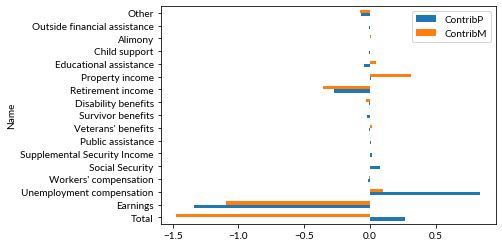

In [3]:
# Table made manually from combining PINC-09 from 2019 and 2018
df = (pd.read_csv('../data/pinc-09-2020-2019.csv', index_col='Name')
        .drop(['Wages and salary', 'Nonfarm self-employment']))
df['Mean2019'] = df['Mean2019'] * (381.2/376.5) #CPI=RS-U
for year in [2020, 2019]:
    df[f'Total{year}'] = df[f'Number{year}'] * df[f'Mean{year}']
    
df['PctCh'] = ((df['Total2020'] / df['Total2019']) - 1) * 100
df['LvlCh'] = df['Total2020'] - df['Total2019']
df['LvlChP'] = (df['Number2020'] * df['Mean2019']) - df['Total2019']
df['LvlChM'] = (df['Number2019'] * df['Mean2020']) - df['Total2019']
df['ContribP'] = (df['LvlChP'] / df.loc['Total', 'LvlCh']) * df.loc['Total', 'PctCh']
df['ContribM'] = (df['LvlChM'] / df.loc['Total', 'LvlCh']) * df.loc['Total', 'PctCh']
df['Contrib'] = (df['LvlCh'] / df.loc['Total', 'LvlCh']) * df.loc['Total', 'PctCh']
print('Total percent change in personal income, 2020 vs 2019: ', f"{df.loc['Total', 'PctCh']:.2f}%")
print(df[['ContribP', 'ContribM', 'Contrib']].round(2))
df[['ContribP', 'ContribM']].plot(kind='barh');

In [6]:
cats = ['Earnings', 'Unemployment compensation', 'Property income', 'Retirement income']

df.loc[cats, ['ContribP', 'ContribM']].to_csv(data_dir / 'pinc.csv', index_label='Name')